1、求解电磁学常微分方程$w=1、初始位置（0,0,0）;初始速度（0,2,0.1）$P22

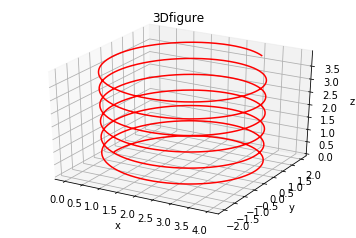

In [30]:
#输出数据时用到了文件包“prettytable.py”
import numpy as np
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D
def RK4(xini,xfinal,nstep):
    #步长
    h=(xfinal-xini)/nstep
    x=[0 for i in range(nstep)]
    y=[0 for i in range(nstep)]
    z=[0 for i in range(nstep)]
    v_x=[0 for i in range(nstep)]
    v_y=[2 for i in range(nstep)]
    v_z=[0.1 for i in range(nstep)]
    for i in range(1,nstep):
        x[i]=x[i-1]+h*(v_x[i-1]+2*(v_x[i-1]+h/2*v_y[i-1])*2+v_x[i-1]+h*v_y[i-1])/6
        y[i]=y[i-1]+h*(v_y[i-1]+2*(v_y[i-1]-h/2*v_x[i-1])*2+v_y[i-1]-h*v_x[i-1])/6
        z[i]=z[i-1]+h*(v_z[i-1]+2*(v_z[i-1]+h/2*0)*2+v_z[i-1]+h*0)/6
        v_x[i]=v_x[i-1]+h*(v_y[i-1]+2*(v_y[i-1]-h/2*v_x[i-1])*2+v_y[i-1]-h*v_x[i-1])/6
        v_y[i]=v_y[i-1]+h*(-v_x[i-1]+2*(-v_x[i-1]-h/2*v_y[i-1])*2-v_x[i-1]-h*v_y[i-1])/6
        v_z[i]=v_z[i-1]
    return(x,y,z)
# 设置三维坐标
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("3Dfigure")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# 画图
figure=ax.plot(RK4(0,40,10000)[0],RK4(0,40,10000)[1],RK4(0,40,10000)[2],c="r")
plt.show()

2、数值求解二阶偏微分方程$$y''-2y'+2y=e^{2x}sin(x),x:[0,1]\ \ with \  \        y(0)=-0.4,y'(0)=-0.6$$


+---------------------+----------------------+
|          x          |    数值计算结果y     |
+---------------------+----------------------+
|         0.0         |         -0.4         |
|        0.025        | -0.41500000000000004 |
|         0.05        |       -0.43025       |
| 0.07500000000000001 | -0.4457273256001189  |
|         0.1         | -0.4614061827775015  |
|        0.125        | -0.4772574137194362  |
| 0.15000000000000002 | -0.4932482379734651  |
| 0.17500000000000002 | -0.5093419782189929  |
|         0.2         |  -0.525497769942263  |
|        0.225        | -0.5416702542739199  |
|         0.25        | -0.5578092532257668  |
|        0.275        | -0.5738594265408689  |
| 0.30000000000000004 | -0.5897599093488949  |
|        0.325        | -0.6054439297966637  |
| 0.35000000000000003 | -0.6208384058023518  |
|        0.375        |  -0.635863520060846  |
|         0.4         | -0.6504322724074187  |
| 0.42500000000000004 | -0.6644500086273941  |
|         0.45     

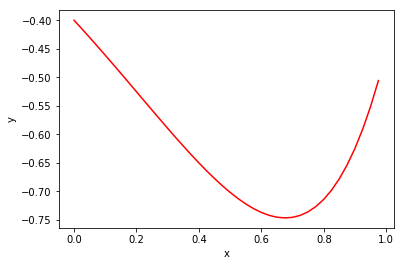

In [37]:
#输出数据时用到了文件包“prettytable.py”
import numpy as np
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D
#降阶法，令y1=y'
def solution(xini,xfinal,nstep):
    h=(xfinal-xini)/nstep
    y=[-0.4 for i in range(nstep)]
    y1=[-0.6 for i in range(nstep)]
    x=[i*h for i in range(nstep)]
    for i in range(1,nstep):
        y1[i]=y1[i-1]+h*(2*y1[i-1]-2*y[i-1]+math.exp(2*x[i-1])*math.sin(x[i-1]))
        y[i]=y[i-1]+h*y1[i-1]
    return(x,y)
col = PrettyTable()
col.add_column("x",solution(0,1,40)[0])
col.add_column("数值计算结果y",solution(0,1,40)[1])
print(col)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(solution(0,1,40)[0],solution(0,1,40)[1],c="r")

3、洛伦兹吸引子，重复结果，并额外给出至少2组不同的$\beta ,\rho ,\sigma $的结果P31

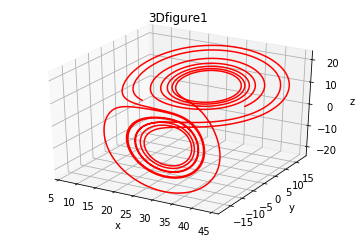

In [43]:
#输出数据时用到了文件包“prettytable.py”
import numpy as np
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D
beta=8/3
rho=28
sigma=10
def luolunzi(xini,xfinal,nstep):
    h=(xfinal-xini)/nstep
    x=[12 for i in range(nstep)]
    y=[4 for i in range(nstep)]
    z=[0 for i in range(nstep)]
    for i in range(1,nstep):
        x[i]=x[i-1]+h*(-beta*x[i-1]+y[i-1]*z[i-1])
        y[i]=y[i-1]+h*(-sigma*y[i-1]+sigma*z[i-1])
        z[i]=z[i-1]+h*(-y[i-1]*x[i-1]+rho*y[i-1]-z[i-1])
    return(x,y,z)
# 设置三维坐标
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("3Dfigure1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# 画图
figure=ax.plot(luolunzi(0,10,100000)[0],luolunzi(0,10,100000)[1],luolunzi(0,10,100000)[2],c="r")
plt.show()

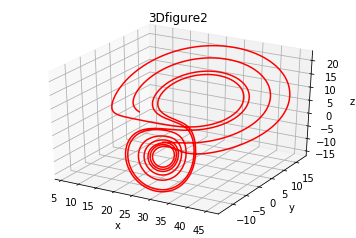

In [44]:
beta=5/3
rho=28
sigma=10
# 设置三维坐标
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("3Dfigure2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# 画图
figure=ax.plot(luolunzi(0,10,100000)[0],luolunzi(0,10,100000)[1],luolunzi(0,10,100000)[2],c="r")
plt.show()

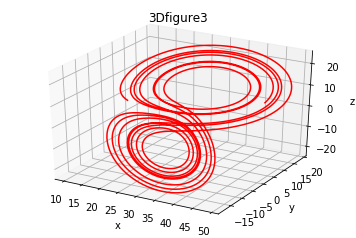

In [48]:
beta=8/3
rho=32
sigma=10
# 设置三维坐标
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("3Dfigure3")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# 画图
figure=ax.plot(luolunzi(0,10,100000)[0],luolunzi(0,10,100000)[1],luolunzi(0,10,100000)[2],c="r")
plt.show()

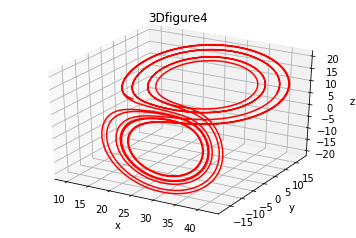

In [47]:
beta=8/3
rho=28
sigma=14
# 设置三维坐标
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("3Dfigure4")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# 画图
figure=ax.plot(luolunzi(0,10,100000)[0],luolunzi(0,10,100000)[1],luolunzi(0,10,100000)[2],c="r")
plt.show()

由图2、3、4和图1比较得：$\beta$越小下面的圆形更紧密，上面的圆形更松散$\rho$变大使得两个圆形联系的线条数目变多，$\sigma$变大使得线条数变少

4、P58
给出数值结果

+------+------------------------+
|  x   |     数值计算结果u      |
+------+------------------------+
| 0.0  |           0            |
| 0.01 | -0.0059999999999999195 |
| 0.02 | -0.011999999999999839  |
| 0.03 |  -0.01799999999999976  |
| 0.04 |  -0.02399999999999968  |
| 0.05 |  -0.0299999999999996   |
| 0.06 |  -0.03599999999999952  |
| 0.07 | -0.041999999999999434  |
| 0.08 | -0.047999999999999356  |
| 0.09 |  -0.05399999999999928  |
| 0.1  |  -0.05999999999999921  |
| 0.11 |  -0.06599999999999913  |
| 0.12 |  -0.07199999999999904  |
| 0.13 |  -0.07799999999999896  |
| 0.14 |  -0.08399999999999888  |
| 0.15 |  -0.0899999999999988   |
| 0.16 |  -0.09599999999999873  |
| 0.17 |  -0.10199999999999865  |
| 0.18 |  -0.10799999999999857  |
| 0.19 |  -0.11399999999999849  |
| 0.2  |  -0.11999999999999843  |
| 0.21 |  -0.1259999999999984   |
| 0.22 |  -0.13199999999999837  |
| 0.23 |  -0.13799999999999835  |
| 0.24 |  -0.14399999999999832  |
| 0.25 |  -0.1499999999999983   |
| 0.26 |  -0.1559999

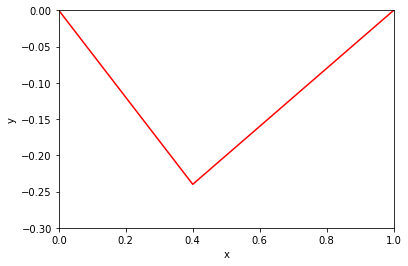

In [29]:
#输出数据时用到了文件包“prettytable.py”
import numpy as np
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D
def M1(a,b,c,d):#a、c参数是三对角矩阵的非对角元，b为对角元，AX=d
    n=len(b)
    q=[]
    p=[]
    x=[]
    for j in range(n-1):
        q.append(j)
    for k in range(n):
        p.append(k)
        x.append(k)
    q[0]=c[0]/b[0]
    p[0]=d[0]/b[0]
    for i in range(1,n-1):
        q[i]=c[i]/(b[i]-q[i-1]*a[i-1])
    for j in range(1,n):
        p[j]=(d[j]-p[j-1]*a[j-1])/(b[j]-q[j-1]*a[j-1])
    x[n-1]=p[n-1]
    for k in range(n-2,-1,-1):
        x[k]=p[k]-q[k]*x[k+1]
    return (x)#反回AX=d的解在一个列表中
def F(nstep):
    h=1/(nstep+1)
    x1=[i/(nstep+1) for i in range(nstep+2)]
    d1=[0 for i in range(nstep+2)]
    u1=[0 for i in range(nstep+2)]
    b1=[-2 for i in range(nstep+2)]
    a1=[1 for i in range(nstep+2)]
    c1=[1 for i in range(nstep+2)]
    for i in range(1,nstep+1):
        if(0.4*nstep-0.6<i<0.4*nstep+1.4):
            d1[i]=h#和讲义P57的1/h不同是为了得到P58的图线
        else:
            d1[i]=0
    Y=M1(a1[3:],b1[2:],c1[3:],d1[1:nstep+1])
    for i in range(1,nstep+1):
        u1[i]=Y[i-1]
    return(x1,u1)
col = PrettyTable()
col.add_column("x",F(99)[0])
col.add_column("数值计算结果u",F(99)[1])
print(col)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.3,0,0.05)
plt.xlim(0,1,0.2)
plt.plot(F(99)[0],F(99)[1],c="r")